# Analysis for recycle scenarios

This notebook provides analysis for all of the recycle scenarios that are included in 
Amanda Bachmann's disseration. Analysis of each scenario includes the uranium resoucre, 
SWU capacity and the amount of waste disposed. 

Scenarios are numbered as follows:
* Scenario 14: Limited reycle of all fuel, no energy growth
* Scenario 15: Limited recycle of non-TRISO fuel, no energy growth
* Scenario 16: Continuous recycle, no energy growth
* Scenario 17: Limited recycle of all fuel, 1% eergy growth
* Scenario 18: Limited recycle of non-TRISO fuel, 1% energy growth
* Scenario 19: Continuos recycle, 1% energy growth

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append("../../../scripts")
import dataframe_analysis as dfa
import transition_metrics as tm

In [3]:
# Enrichment Constants
assays = {'LWR': 0.043, 'MMR':0.1975, 'Xe-100':0.155, 
          'VOYGR':0.0409, 'feed':0.00711,'tails':0.002,
         'SFR':0.1979}

# Reactor Deployment Constants
non_lwr = ['Sink_HLW', 'Sink_LLW', 'Mine',
                 'LWREnrichment', 'MMREnrichment', 'Xe100Enrichment',
                 'VOYGREnrichment','United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
                 'MMR', 'Xe-100','VOYGR', 'Xe100_UOX_Cooling',
                 'MMR_UOX_Cooling', 'VOYGR_UOX_Cooling',
                 'Xe100_MOX_Mixer', 'VOYGR_MOX_Mixer', 'MOXCoolingPool',
                 'SeparationsFacility', 'SeparationsInstitution', 'Sink_LWR_UOX', 'SFR']
adv_rxs = ['MMR', 'Xe-100', 'VOYGR', 'SFR']

colors = {'s14':'tab:orange', 's15':'tab:purple','s16':'tab:brown',
                   's17':'tab:orange', 's18':'tab:purple','s19':'tab:brown'}
lines = {'s14':(0,(3,5,1)), 's15':(0,(5,3)),'s16':'-.',
                's17':(0,(3,5,1)), 's18':(0,(5,3)),'s19':'-.',}
labels = {'s14':'Scenario 14', 's15':'Scenario 15', 's16':'Scenario 16', 's17':'Scenario 17',
         's18':'Scenario 18', 's19':'Scenario 19'}
legend_order = [1, 5, 4, 0, 2, 3]

# Mass fraction of uranium in fuel for each type of reactor
uranium_fractions = {'LWR':1, 'MMR':0.881481, 'Xe-100':0.895285, 'VOYGR':0.881481,
                    'SFR':0.9}
hm_fractions = {'VOYGR':0.88151, 'Xe-100':0.89618, 'SFR':0.9}
natu_fractions = {'Xe-100':0.85105, 'VOYGR':0.97943, 'SFR':0.76588} # fraction of heavy metal that is Nat U

#Waste commodity names for each type of reactor
waste_commodity = {'LWR':'spent_uox', 'MMR':'spent_MMR_haleu',
                   'Xe-100':'spent_xe100_haleu', 'VOYGR':'spent_smr_fuel',
                  'SFR':'spent_haleu'}
uox_commodity = {'LWR':'fresh_uox', 'MMR':'fresh_MMR_uox',
                   'Xe-100':'fresh_xe100_uox', 'VOYGR':'fresh_smr_uox', 
                   'SFR':'fresh_haleu'}
mox_commodity = {'Xe-100':'fresh_xe100_mox', 'VOYGR':'fresh_smr_mox',
                'SFR':'fresh_reprocessed'}

#Time period
time = np.linspace(2025, 2089, 65)

out_files = {'s14':'../outputs/scenario14.sqlite', 's15':'../outputs/scenario15.sqlite',
             's16':'../outputs/scenario16.sqlite', 's17':'../outputs/scenario17.sqlite',
             's18':'../outputs/scenario18.sqlite', 's19':'../outputs/scenario19.sqlite'}

## No growth demand

### Reactor numbers -- match up with once through scenarios

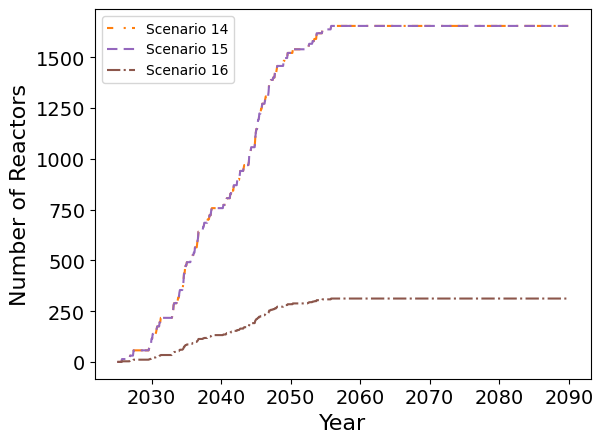

In [3]:
reactors_nogrowth = {'s14':'','s15':'','s16':''}
plt.figure(0)
for scenario in reactors_nogrowth:
    reactors_nogrowth[scenario] = tm.get_prototype_totals(out_files[scenario], non_lwr, adv_rxs)
    plt.plot(reactors_nogrowth[scenario]['Year'][721:], reactors_nogrowth[scenario]['advrx_total'][721:], 
             label=labels[scenario],
            color = colors[scenario], linestyle=lines[scenario])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Reactors', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig('figures/nogrowth_recycle_reactors.pdf', bbox_inches='tight')

In [5]:
for scenario in reactors_nogrowth:
    for adv_rx in adv_rxs:
        print(f'Max {adv_rx} in {scenario}:', reactors_nogrowth[scenario][adv_rx +'_total'].max())
        print(f'Max {adv_rx} added in one step in {scenario}:', reactors_nogrowth[scenario][adv_rx +'_enter'].max())
        prototype_sum = reactors_nogrowth[scenario][adv_rx +'_enter'].cumsum()
        print(f'Total number of {adv_rx} deployed in {scenario}:', prototype_sum.iloc[-1])
    print(f'Max Adv Rx in {scenario}:', reactors_nogrowth[scenario]['advrx_total'].max())
    print(f'Max Adv Rx added in one step in {scenario}:', reactors_nogrowth[scenario]['advrx_enter'].max())
    advrx_sum = reactors_nogrowth[scenario]['advrx_enter'].cumsum()
    print(f'Total number of reactors deployed in {scenario}:', advrx_sum.iloc[-1])  

Max MMR in s14: 542.0
Max MMR added in one step in s14: 16.0
Total number of MMR deployed in s14: 1633.0
Max Xe-100 in s14: 1105.0
Max Xe-100 added in one step in s14: 46.0
Total number of Xe-100 deployed in s14: 1155.0
Max VOYGR in s14: 7.0
Max VOYGR added in one step in s14: 1.0
Total number of VOYGR deployed in s14: 7.0
Max SFR in s14: 0.0
Max SFR added in one step in s14: 0.0
Total number of SFR deployed in s14: 0.0
Max Adv Rx in s14: 1654.0
Max Adv Rx added in one step in s14: 52.0
Total number of reactors deployed in s14: 2795.0
Max MMR in s15: 542.0
Max MMR added in one step in s15: 16.0
Total number of MMR deployed in s15: 1633.0
Max Xe-100 in s15: 1105.0
Max Xe-100 added in one step in s15: 46.0
Total number of Xe-100 deployed in s15: 1155.0
Max VOYGR in s15: 7.0
Max VOYGR added in one step in s15: 1.0
Total number of VOYGR deployed in s15: 7.0
Max SFR in s15: 0.0
Max SFR added in one step in s15: 0.0
Total number of SFR deployed in s15: 0.0
Max Adv Rx in s15: 1654.0
Max Adv R

### Fuel Mass

In [3]:
transactions_nogrowth = {'s14':'', 's15':'', 's16':''}

for key in transactions_nogrowth:
    scenario = key[:3]
    transactions_nogrowth[scenario] = tm.add_receiver_prototype(out_files[scenario])

In [4]:
# Divide up fuel mass by prototype
uranium_to_reactors = {'s14_MMR':'', 's14_Xe-100':'', 's14_VOYGR':'', 's14_LWR':'',
                       's15_MMR':'', 's15_Xe-100':'', 's15_VOYGR':'', 's15_LWR':'',
                       's16_SFR':'', 's16_LWR':''}
mox_to_reactors = {'s14_Xe-100':'', 's14_VOYGR':'', 
                   's15_Xe-100':'', 's15_VOYGR':'',
                   's16_SFR':''}

for key in uranium_to_reactors:
    scenario = key[:3]
    reactor = key[4:]
    if reactor == 'LWR':
        uranium_to_reactors[key] = dfa.commodity_to_LWR(transactions_nogrowth[scenario], 
                                                       'fresh_uox',adv_rxs)
    else:
        uranium_to_reactors[key] = dfa.commodity_to_prototype(transactions_nogrowth[scenario], 
                                                       uox_commodity[reactor], reactor)
        uranium_to_reactors[key]['Quantity'] = uranium_to_reactors[key]['Quantity']*uranium_fractions[reactor]
    if reactor == 'Xe-100' or reactor == 'VOYGR' or reactor == 'SFR':
        mox_to_reactors[key] = dfa.commodity_to_prototype(transactions_nogrowth[scenario],
                                                 mox_commodity[reactor], reactor)
        mox_to_reactors[key]['Quantity'] = mox_to_reactors[key]['Quantity']*hm_fractions[reactor]

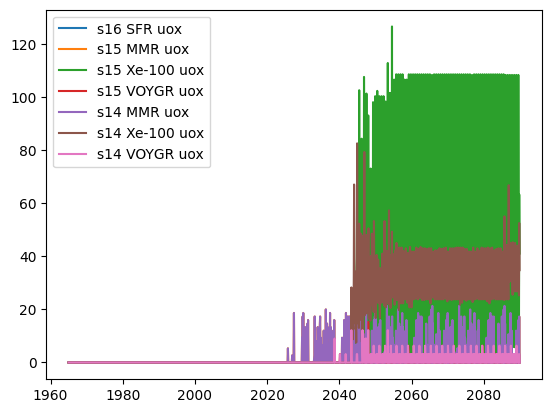

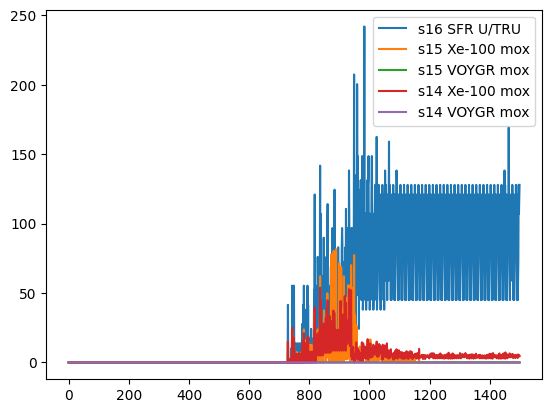

In [5]:
for scenario in ['s16','s15','s14']:
    plt.figure(0)
    if scenario == 's16':
        plt.plot(uranium_to_reactors[scenario + '_SFR']['Year'],
                 uranium_to_reactors[scenario + '_SFR']['Quantity']/1000, label = (scenario + ' SFR uox'))
    else:
        for reactor in ['MMR', 'Xe-100','VOYGR']:
            plt.plot(uranium_to_reactors[scenario + '_' + reactor]['Year'],
                     uranium_to_reactors[scenario + '_' + reactor]['Quantity']/1000, label = (scenario + ' ' + reactor+' uox'))
    plt.legend()

    plt.figure(1)
    if scenario == 's16':
        plt.plot(mox_to_reactors[scenario + '_SFR']['Quantity']/1000, label = (scenario + ' SFR U/TRU'))
    else:
        for reactor in ['Xe-100', 'VOYGR']:
            plt.plot(mox_to_reactors[scenario + '_' + reactor]['Quantity']/1000, label = (scenario + ' ' + reactor+' mox'))
    plt.legend()

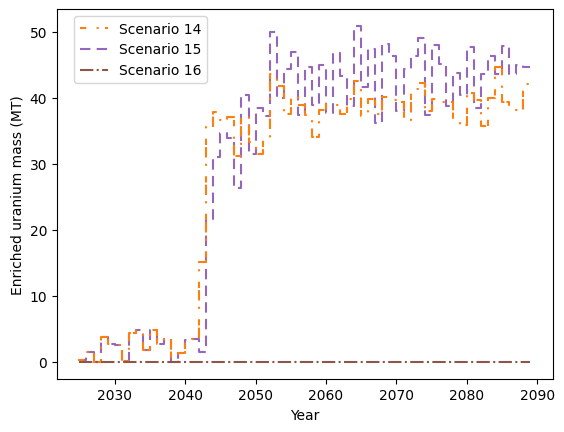

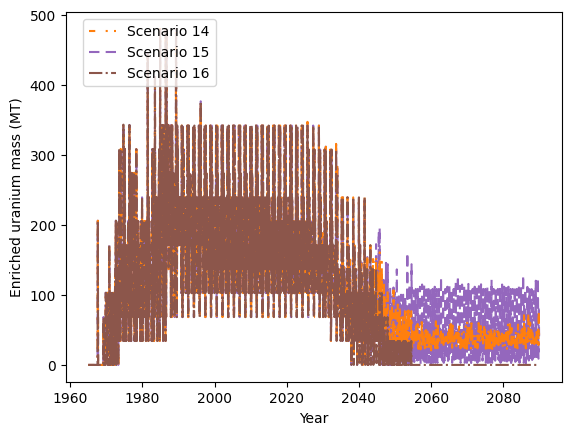

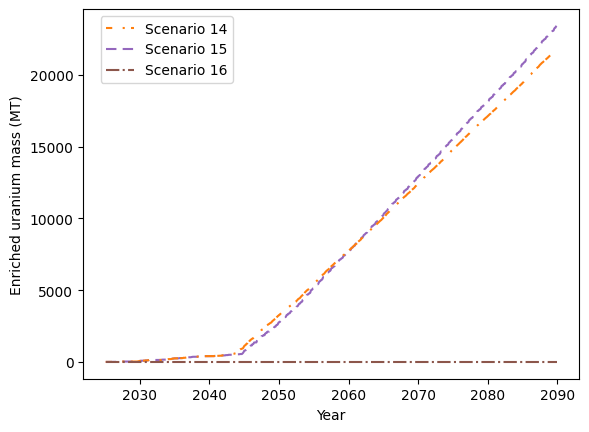

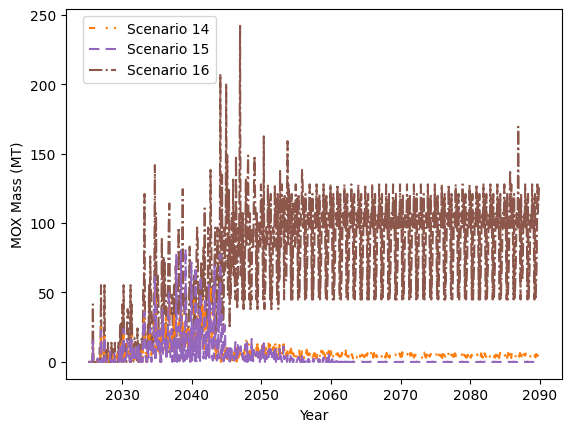

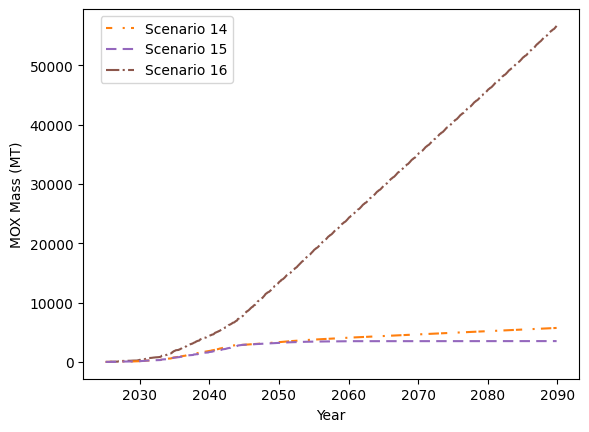

In [6]:
for key in ['s15','s14','s16']:
    if key == 's16':
        AR_uranium = uranium_to_reactors[key + '_SFR'].copy()
    else:
        AR_uranium = uranium_to_reactors[key + '_MMR'].copy()
        for reactor in ['Xe-100', 'VOYGR']:
            AR_uranium['Quantity'] += uranium_to_reactors[key + '_' + reactor]['Quantity']
    averages = []
    counter = 721
    for ii in range(0, 65):
        year_data = AR_uranium['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter +=12
        
    ax0=plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key], 
            color =colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Enriched uranium mass (MT)')
    
    total_uranium = AR_uranium['Quantity'] + uranium_to_reactors[key + '_LWR']['Quantity']
    ax1=plt.figure(1)
    plt.plot(AR_uranium['Year'], total_uranium/1000, 
            label = labels[key], color = colors[key], linestyle=lines[key]) 
    plt.xlabel('Year')
    plt.ylabel('Enriched uranium mass (MT)')
    
    ax2=plt.figure(2)
    plt.plot(AR_uranium['Year'][721:], AR_uranium['Quantity'][721:].cumsum()/1000,
            label=labels[key], color=colors[key], linestyle = lines[key])
    plt.xlabel('Year')
    plt.ylabel('Enriched uranium mass (MT)')

for key in ['s16','s14','s15']:
    if key == 's16':
        total_mox = mox_to_reactors[key+'_SFR']['Quantity']
    else:
        total_mox = mox_to_reactors[key+'_Xe-100']['Quantity'] + mox_to_reactors[key+'_VOYGR']['Quantity']
    ax3=plt.figure(3)
    plt.plot(AR_uranium['Year'][721:], total_mox[721:]/1000,
            label=labels[key], color=colors[key], linestyle = lines[key])
    plt.xlabel('Year')
    plt.ylabel('MOX Mass (MT)')

    ax4=plt.figure(4)
    plt.plot(AR_uranium['Year'][721:], total_mox[721:].cumsum()/1000,
            label=labels[key], color=colors[key], linestyle = lines[key])
    plt.xlabel('Year')
    plt.ylabel('MOX Mass (MT)')
    
handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax0.savefig("figures/nogrowth_recycle_Uaverages.pdf", bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax1.savefig("figures/nogrowth_recycle_total_fuel.pdf", bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax2.savefig("figures/nogrowth_recycle_Ucumulative.pdf", bbox_inches='tight')
handles, legend_labels = ax3.gca().get_legend_handles_labels()
ax3.legend([handles[idx] for idx in [1,2,0]],[legend_labels[idx] for idx in [1,2,0]], bbox_to_anchor=(0.37, 0.88))
ax3.savefig("figures/nogrowth_recycle_MOX.pdf", bbox_inches='tight')
handles, legend_labels = ax4.gca().get_legend_handles_labels()
ax4.legend([handles[idx] for idx in [1,2,0]],[legend_labels[idx] for idx in [1,2,0]], bbox_to_anchor=(0.37, 0.88))
ax4.savefig("figures/nogrowth_recycle_MOXcumulative.pdf", bbox_inches='tight')

In [7]:
#Reporting UOX masses
for scenario in transactions_nogrowth:
    if scenario == 's16':
        HALEU_mass = uranium_to_reactors[scenario+'_SFR']
        AR_mass = HALEU_mass
    else:
        HALEU_mass = uranium_to_reactors[scenario+'_MMR'] + uranium_to_reactors[scenario+'_Xe-100']
        AR_mass = HALEU_mass + uranium_to_reactors[scenario+'_VOYGR']
        print('Non-HALEU max in:',scenario, uranium_to_reactors[scenario+'_VOYGR'][721:]['Quantity'].max()/1000)
    print('Average HALEU mass in', scenario,'after 2025:', HALEU_mass[721:]['Quantity'].mean()/1000)
    print('Average mass in', scenario, 'after 2025:', 
          AR_mass[721:]['Quantity'].mean()/1000)
    print('Maximum mass in', scenario, 'after 2025:', 
          AR_mass[721:]['Quantity'].max()/1000)
    print('Cumulative mass in', scenario, 'after 2025:',AR_mass[721:]['Quantity'].cumsum()[1499]/1000)

Non-HALEU max in: s14 12.161793356999999
Average HALEU mass in s14 after 2025: 27.15806870581743
Average mass in s14 after 2025: 28.010174843718662
Maximum mass in s14 after 2025: 87.00540971088598
Cumulative mass in s14 after 2025: 21819.926203256844
Non-HALEU max in: s15 15.323859629820001
Average HALEU mass in s15 after 2025: 29.195582719412293
Average mass in s15 after 2025: 30.047688857313528
Maximum mass in s15 after 2025: 143.830287571658
Cumulative mass in s15 after 2025: 23407.14961984722
Average HALEU mass in s16 after 2025: 0.0
Average mass in s16 after 2025: 0.0
Maximum mass in s16 after 2025: 0.0
Cumulative mass in s16 after 2025: 0.0


In [8]:
#Reporting MOX/U-TRU masses
for scenario in transactions_nogrowth:
    if scenario == 's16':
        MOX_mass = mox_to_reactors[scenario+'_SFR']
    else:
        MOX_mass = mox_to_reactors[scenario+'_VOYGR'] + mox_to_reactors[scenario+'_Xe-100']
    print('Average MOX mass in', scenario,'after 2025:', MOX_mass[721:]['Quantity'].mean()/1000)
    print('Maximum MOX mass in', scenario, 'after 2025:', 
          MOX_mass[721:]['Quantity'].max()/1000)
    print('Cumulative MOX mass in', scenario, 'after 2025:',MOX_mass[721:]['Quantity'].cumsum()[1499]/1000)

Average MOX mass in s14 after 2025: 7.351443551094222
Maximum MOX mass in s14 after 2025: 53.811307336
Cumulative MOX mass in s14 after 2025: 5726.7745263024
Average MOX mass in s15 after 2025: 4.505775287817201
Maximum MOX mass in s15 after 2025: 81.59295903039998
Cumulative MOX mass in s15 after 2025: 3509.998949209603
Average MOX mass in s16 after 2025: 72.69578433889602
Maximum MOX mass in s16 after 2025: 241.92
Cumulative MOX mass in s16 after 2025: 56630.016


### Natural uranium masses

In [9]:
tails_nogrowth = {'s14_MMR':'', 's14_Xe-100':'', 's14_VOYGR':'', 's14_LWR':'',
                       's15_MMR':'', 's15_Xe-100':'', 's15_VOYGR':'', 's15_LWR':'',
                       's16_SFR':'', 's16_LWR':''}
feed_nogrowth = {'s14_MMR':'', 's14_Xe-100':'', 's14_VOYGR':'', 's14_LWR':'',
                       's15_MMR':'', 's15_Xe-100':'', 's15_VOYGR':'', 's15_LWR':'',
                       's16_SFR':'', 's16_LWR':''}
SWU_nogrowth = {'s14_MMR':'', 's14_Xe-100':'', 's14_VOYGR':'', 's14_LWR':'',
                       's15_MMR':'', 's15_Xe-100':'', 's15_VOYGR':'', 's15_LWR':'',
                       's16_SFR':'', 's16_LWR':''}
nat_u_nogrowth = {'s14_Xe-100':'', 's14_VOYGR':'', 
                   's15_Xe-100':'', 's15_VOYGR':'',
                   's16_SFR':''}

for key in tails_nogrowth:
    reactor = key[4:]
    tails_nogrowth[key] = dfa.calculate_tails(uranium_to_reactors[key]['Quantity'],
                                    assays[reactor], assays['tails'], assays['feed'])
    feed_nogrowth[key] = dfa.calculate_feed(uranium_to_reactors[key]['Quantity'],
                                  tails_nogrowth[key])
    SWU_nogrowth[key] = dfa.calculate_SWU(uranium_to_reactors[key]['Quantity'], assays[reactor],
                                tails_nogrowth[key], assays['tails'], feed_nogrowth[key], assays['feed'])
    if reactor in ['Xe-100', 'VOYGR','SFR']:
        nat_u_nogrowth[key] = natu_fractions[reactor]*mox_to_reactors[key]['Quantity']

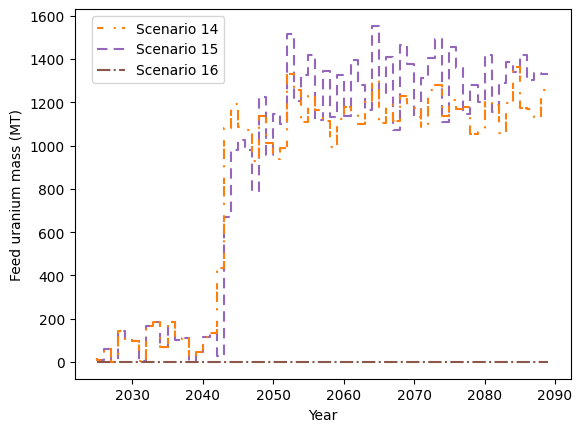

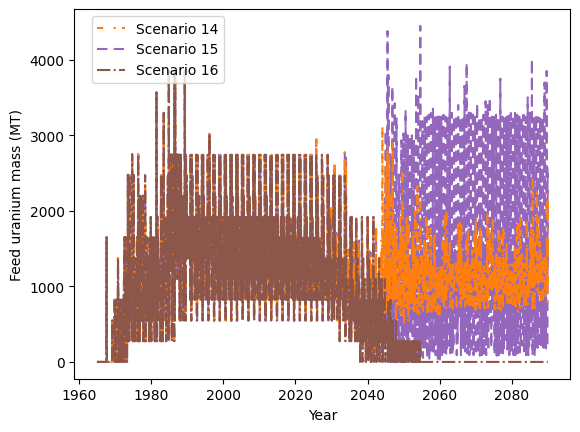

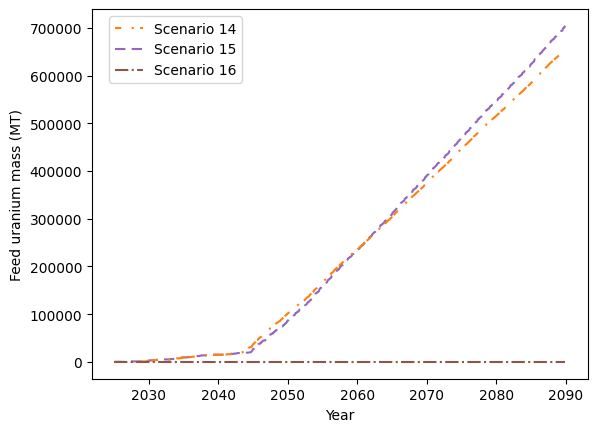

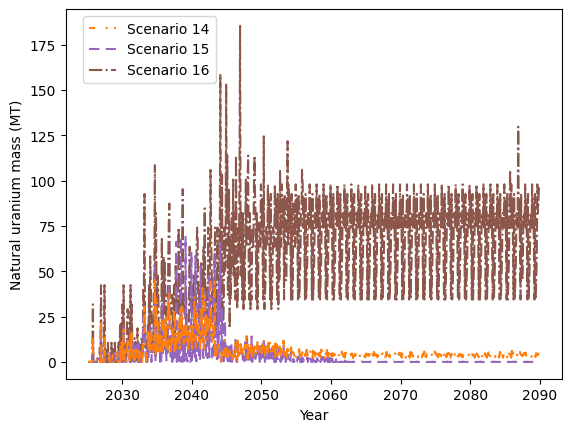

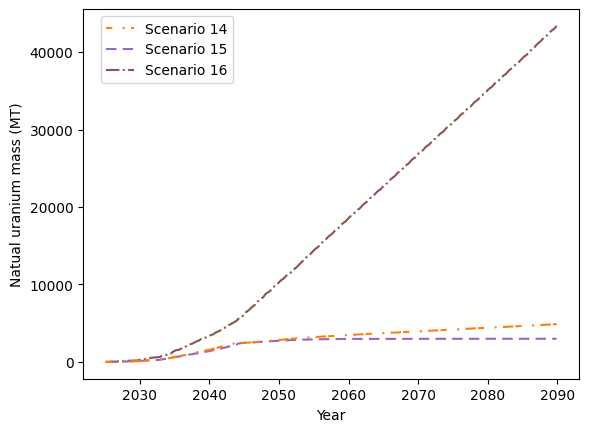

In [10]:
# Feed uranium
for scenario in ['s15','s14','s16']:
    if scenario == 's16':
        AR_feed = feed_nogrowth[scenario + '_SFR'].copy()
    else:
        AR_feed = feed_nogrowth[scenario + '_MMR'].copy()
        for reactor in ['Xe-100','VOYGR']:
            AR_feed += feed_nogrowth[scenario + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0, 65):
        year_data = AR_feed[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12

    #yearly average for advanced reactors
    ax0 = plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[scenario],
            color=colors[scenario], linestyle=lines[scenario])
    plt.xlabel('Year')
    plt.ylabel('Feed uranium mass (MT)')

    #monthly totals
    total_feed = AR_feed + feed_nogrowth[scenario + '_LWR']
    ax1=plt.figure(1)
    plt.plot(uranium_to_reactors[scenario + '_LWR']['Year'], total_feed/1000,
            label=labels[scenario], color = colors[scenario], linestyle=lines[scenario])
    plt.xlabel('Year')
    plt.ylabel('Feed uranium mass (MT)')

    #cumulative for only advanced reactors
    ax2=plt.figure(2)
    plt.plot(uranium_to_reactors[scenario + '_LWR']['Year'][721:], AR_feed[721:].cumsum()/1000,
            label=labels[scenario], color = colors[scenario], linestyle=lines[scenario])
    plt.xlabel('Year')
    plt.ylabel('Feed uranium mass (MT)')

for scenario in ['s16','s15','s14']:
    if scenario == 's16':
        nat_u = nat_u_nogrowth['s16_SFR']
    else:
        nat_u = nat_u_nogrowth[scenario + '_Xe-100'] + nat_u_nogrowth[scenario + '_VOYGR']    
    #nat U for MOX/U-TRU
    ax3=plt.figure(3)
    plt.plot(uranium_to_reactors[scenario + '_LWR']['Year'][721:], nat_u[721:]/1000,
            label=labels[scenario], color = colors[scenario], linestyle=lines[scenario])
    plt.xlabel('Year')
    plt.ylabel('Natural uranium mass (MT)')

    #cumulative nat U for MOX/U-TRU
    ax4=plt.figure(4)
    plt.plot(uranium_to_reactors[scenario + '_LWR']['Year'][721:], nat_u[721:].cumsum()/1000,
            label=labels[scenario], color = colors[scenario], linestyle=lines[scenario])
    plt.xlabel('Year')
    plt.ylabel('Natual uranium mass (MT)')

handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax0.savefig("figures/nogrowth_recycle_feed_average.pdf", bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax1.savefig("figures/nogrowth_recycle_feed.pdf", bbox_inches='tight')
handles, legend_labels = ax2.gca().get_legend_handles_labels()
ax2.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax2.savefig("figures/nogrowth_recycle_feed_cumulative.pdf", bbox_inches='tight')
handles, legend_labels = ax3.gca().get_legend_handles_labels()
ax3.legend([handles[idx] for idx in [2,1,0]],[legend_labels[idx] for idx in [2,1,0]], bbox_to_anchor=(0.37, 0.88))
ax3.savefig("figures/nogrowth_recycle_natU.pdf", bbox_inches='tight')
handles, legend_labels = ax4.gca().get_legend_handles_labels()
ax4.legend([handles[idx] for idx in [2,1,0]],[legend_labels[idx] for idx in [2,1,0]], bbox_to_anchor=(0.37, 0.88))
ax4.savefig("figures/nogrowth_recycle_natU_cumulative.pdf", bbox_inches='tight')

In [11]:
#Reporting feed masses
for scenario in transactions_nogrowth:
    if scenario == 's16':
        HALEU_feed = feed_nogrowth[scenario+'_SFR']   
        AR_feed = HALEU_feed
    else:
        HALEU_feed = feed_nogrowth[scenario+'_MMR'] + feed_nogrowth[scenario+'_Xe-100']
        AR_feed = HALEU_feed + feed_nogrowth[scenario+'_VOYGR']
    print('Average feed for HALEU in',scenario, 'after 2025:', HALEU_feed[721:].mean()/1000)
    print('AR Average mass in', scenario, 'after 2025:', AR_feed[721:].mean()/1000)
    print('AR Maximum mass in', scenario, 'after 2025:', AR_feed[721:].max()/1000)
    print('AR Cumulative mass in', scenario, 'after 2025:', AR_feed[721:].cumsum()[1499]/1000)

Average feed for HALEU in s14 after 2025: 836.3660740864842
AR Average mass in s14 after 2025: 842.8527529053409
AR Maximum mass in s14 after 2025: 2627.9299865155217
AR Cumulative mass in s14 after 2025: 656582.2945132606
Average feed for HALEU in s15 after 2025: 897.371875276311
AR Average mass in s15 after 2025: 903.8585540951678
AR Maximum mass in s15 after 2025: 4450.452907257366
AR Cumulative mass in s15 after 2025: 704105.813640136
Average feed for HALEU in s16 after 2025: 0.0
AR Average mass in s16 after 2025: 0.0
AR Maximum mass in s16 after 2025: 0.0
AR Cumulative mass in s16 after 2025: 0.0


In [12]:
#Reporting nat U masses
for scenario in transactions_nogrowth:
    if scenario == 's16':  
        nat_u = nat_u_nogrowth['s16_SFR']
    else:
        nat_u = nat_u_nogrowth[scenario + '_Xe-100'] + nat_u_nogrowth[scenario + '_VOYGR']
    print('Average nat U in',scenario, 'after 2025:', nat_u[721:].mean()/1000)
    print('Nat U Maximum mass in', scenario, 'after 2025:', nat_u[721:].max()/1000)
    print('Nat U Cumulative mass in', scenario, 'after 2025:', nat_u[721:].cumsum()[1499]/1000)

Average nat U in s14 after 2025: 6.256446034158739
Nat U Maximum mass in s14 after 2025: 45.79611310830279
Nat U Cumulative mass in s14 after 2025: 4873.771460609614
Average nat U in s15 after 2025: 3.834640058696829
Nat U Maximum mass in s15 after 2025: 69.4396877828219
Nat U Cumulative mass in s15 after 2025: 2987.1846057248144
Average nat U in s16 after 2025: 55.67624730947368
Nat U Maximum mass in s16 after 2025: 185.28168960000002
Nat U Cumulative mass in s16 after 2025: 43371.796654080084


### SWU

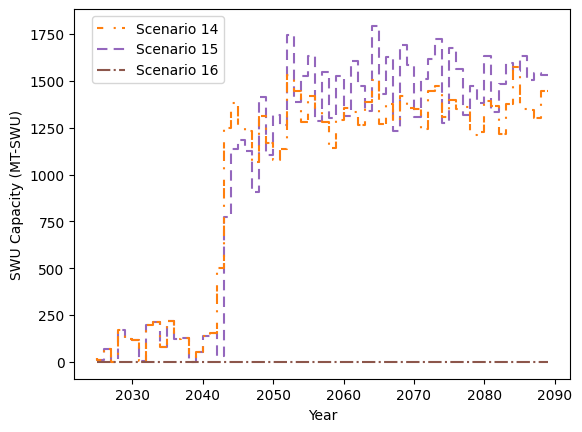

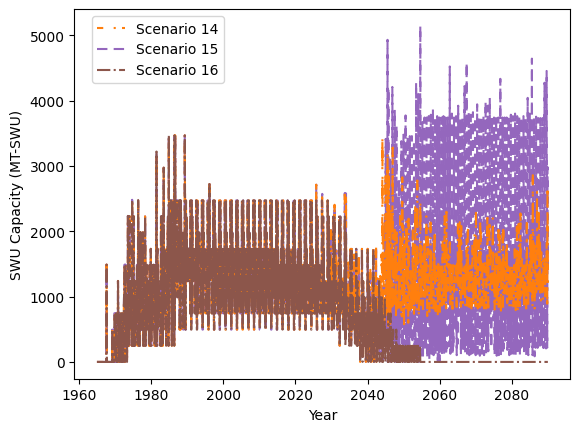

In [13]:
for key in ['s15','s14','s16']:
    if key == 's16':
        AR_swu = SWU_nogrowth[key + '_SFR'].copy()
    else:
        AR_swu = SWU_nogrowth[key + '_MMR'].copy()
        for reactor in ['Xe-100','VOYGR']:
            AR_swu += SWU_nogrowth[key + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0, 65):
        year_data = AR_swu[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
        
    ax0=plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('SWU Capacity (MT-SWU)')
    
    total_swu = AR_swu + SWU_nogrowth[key + '_LWR']
    ax1=plt.figure(1)
    plt.plot(uranium_to_reactors[key + '_LWR']['Year'], total_swu/1000,
            label=labels[key], color = colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('SWU Capacity (MT-SWU)')

handles, legend_labels = ax0.gca().get_legend_handles_labels()
ax0.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax0.savefig("figures/nogrowth_recycle_AR_swu.pdf", bbox_inches='tight')
handles, legend_labels = ax1.gca().get_legend_handles_labels()
ax1.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
ax1.savefig("figures/nogrowth_recycle_swu.pdf", bbox_inches='tight')

In [14]:
#Reporting SWU Requirements
for scenario in transactions_nogrowth:
    if scenario == 's16':
        HALEU_SWU = SWU_nogrowth[scenario+'_SFR']
        AR_SWU = HALEU_SWU
    else:
        HALEU_SWU = SWU_nogrowth[scenario+'_MMR'] + SWU_nogrowth[scenario+'_Xe-100']
        AR_SWU = HALEU_SWU + SWU_nogrowth[scenario+'_VOYGR']
    print('Average HALEU SWU in', scenario, 'after 2025:', HALEU_SWU[721:].mean()/1000)
    print('Average SWU in ', scenario, ':', AR_SWU[721:].mean()/1000)
    print('Maximum SWU in ', scenario, ':', AR_SWU[721:].max()/1000)

Average HALEU SWU in s14 after 2025: 965.8934985671772
Average SWU in  s14 : 971.644353660045
Maximum SWU in  s14 : 3032.6509215609617
Average HALEU SWU in s15 after 2025: 1036.1289761126852
Average SWU in  s15 : 1041.8798312055528
Maximum SWU in  s15 : 5142.3253425093735
Average HALEU SWU in s16 after 2025: 0.0
Average SWU in  s16 : 0.0
Maximum SWU in  s16 : 0.0


### Waste and SNF masses

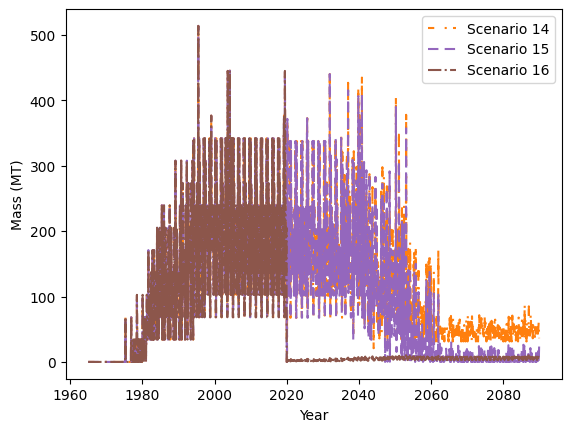

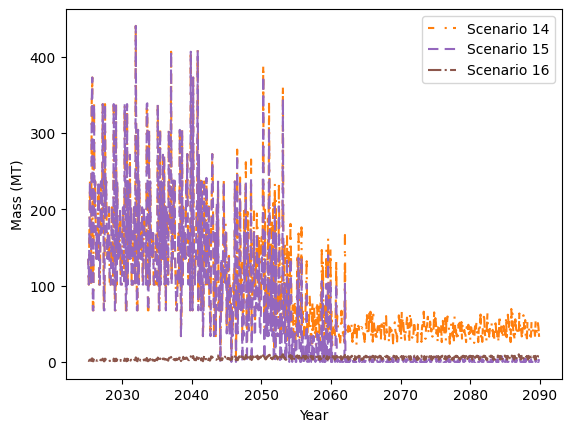

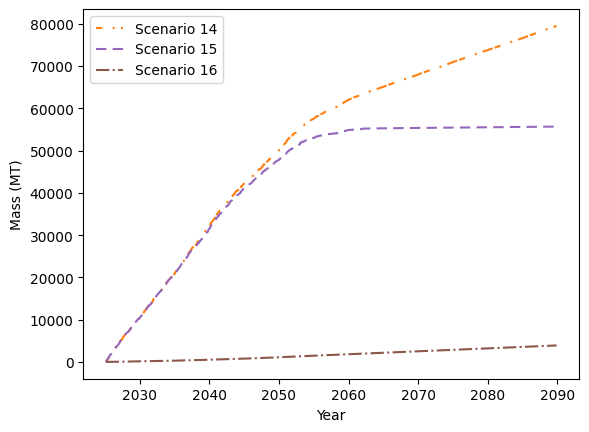

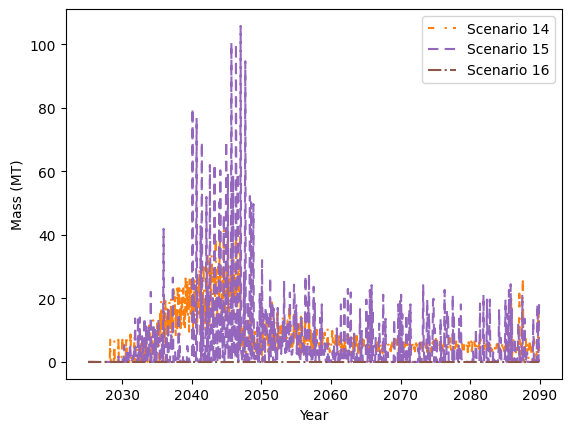

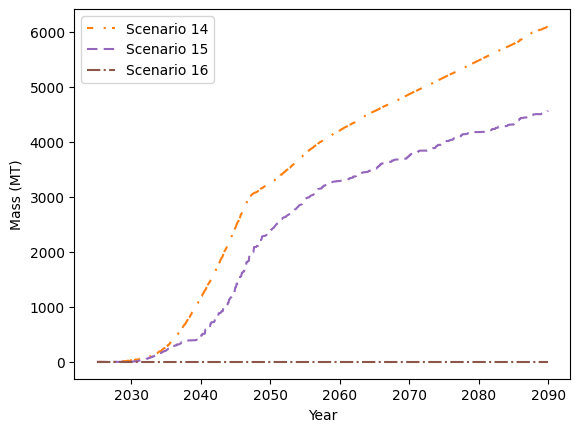

In [19]:
total_waste = {'s14':'', 's15':'', 's16':''} # all material sent to repository
mox_waste = {'s14':'', 's15':'', 's16':''} # spent MOX assemblies sent to repository
separations_waste = {'s14':'', 's15':'', 's16':''} # Separated waste, HLW
transition_waste = {'s14':'', 's15':'', 's16':''} # MOX and Separated waste (SNF + HLW)
snf_waste = {'s14':'', 's15':'', 's16':''}

for key in total_waste:
    total_waste[key] = dfa.transactions_to_prototype(transactions_nogrowth[key], 'Sink_HLW')
    LWR_waste = dfa.transactions_to_prototype(transactions_nogrowth[key], 'Sink_LWR_UOX')
    total_waste[key]['Quantity'] += LWR_waste['Quantity']

    separations_waste[key] = dfa.commodity_to_prototype(transactions_nogrowth[key], 'separated_waste', 'Sink_HLW')
    mox_waste[key] = dfa.commodity_to_prototype(transactions_nogrowth[key], 'cool_spent_mox', 'Sink_HLW')
    transition_waste[key] = separations_waste[key]['Quantity'] + mox_waste[key]['Quantity']
    snf_waste[key] = mox_waste[key]['Quantity']
    if key == 's15':
        mmr_waste = dfa.commodity_to_prototype(transactions_nogrowth[key], 'cool_MMR_uox', 'Sink_HLW')
        xe100_waste = dfa.commodity_to_prototype(transactions_nogrowth[key], 'cool_xe100_uox','SinkHLW')
        snf_waste[key] += mmr_waste['Quantity'] + xe100_waste['Quantity']

    # all waste and SNF
    ax0=plt.figure(0)
    plt.plot(total_waste[key]['Year'], total_waste[key]['Quantity']/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Mass (MT)')
    plt.legend()
    plt.savefig("figures/nogrowth_recycle_totalwaste.pdf")
    
    #plt.figure(1)
    #plt.plot(waste[key]['Year'], waste[key]['Quantity'].cumsum()/1000, label=labels[key],
    #        color=colors[key], linestyle=lines[key])
    #plt.xlabel('Year')
    #plt.ylabel('Waste mass (MT)')
    #plt.legend()

    # Separated fissile material, HLW
    ax2=plt.figure(2)
    plt.plot(separations_waste[key]['Year'][721:], separations_waste[key]['Quantity'][721:]/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Mass (MT)')
    plt.legend()
    plt.savefig("figures/nogrowth_recycle_hlw.pdf")

    # Cumulative SNF + HLW from non-LWRs
    ax5=plt.figure(5)
    plt.plot(separations_waste[key]['Year'][721:], transition_waste[key][721:].cumsum()/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Mass (MT)')
    plt.legend()
    plt.savefig("figures/nogrowth_recycle_snf_hlw_cumulative.pdf")
    

    # all SNF waste disposed of, MOX + LWR SNF
    ax6=plt.figure(6)
    plt.plot(separations_waste[key]['Year'][721:], snf_waste[key][721:]/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Mass (MT)')
    plt.legend()
    plt.savefig("figures/nogrowth_recycle_snf.pdf")

    ax7=plt.figure(7)
    plt.plot(separations_waste[key]['Year'][721:], snf_waste[key][721:].cumsum()/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Mass (MT)')
    plt.legend()
    plt.savefig("figures/nogrowth_recycle_snf_cumulative.pdf")
#handles, legend_labels = ax0.gca().get_legend_handles_labels()
#ax0.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
#ax0.savefig("figures/nogrowth_recycle_feed_average.pdf", bbox_inches='tight')
#handles, legend_labels = ax2.gca().get_legend_handles_labels()
#ax2.legend([handles[idx] for idx in [1,0,2]],[legend_labels[idx] for idx in [1,0,2]], bbox_to_anchor=(0.37, 0.88))
#ax2.savefig("figures/nogrowth_recycle_feed_cumulative.pdf", bbox_inches='tight')
#handles, legend_labels = ax3.gca().get_legend_handles_labels()
#ax3.legend([handles[idx] for idx in [2,1,0]],[legend_labels[idx] for idx in [2,1,0]], bbox_to_anchor=(0.37, 0.88))
#ax3.savefig("figures/nogrowth_recycle_natU.pdf", bbox_inches='tight')
#handles, legend_labels = ax4.gca().get_legend_handles_labels()
#ax4.legend([handles[idx] for idx in [2,1,0]],[legend_labels[idx] for idx in [2,1,0]], bbox_to_anchor=(0.37, 0.88))
#ax4.savefig("figures/nogrowth_recycle_natU_cumulative.pdf", bbox_inches='tight')
#handles, legend_labels = ax5.gca().get_legend_handles_labels()
#ax5.legend([handles[idx] for idx in [2,1,0]],[legend_labels[idx] for idx in [2,1,0]], bbox_to_anchor=(0.37, 0.88))
#ax5.savefig("figures/nogrowth_recycle_natU_cumulative.pdf", bbox_inches='tight')
#handles, legend_labels = ax6.gca().get_legend_handles_labels()
#ax6.legend([handles[idx] for idx in [2,1,0]],[legend_labels[idx] for idx in [2,1,0]], bbox_to_anchor=(0.37, 0.88))
#ax6.savefig("figures/nogrowth_recycle_natU_cumulative.pdf", bbox_inches='tight')

In [20]:
#Reporting waste masses
for scenario in transactions_nogrowth:
    print('Average SNF waste in', scenario, 'after 2025:', snf_waste[scenario][721:].mean()/1000)
    print('Maxmum SNF waste in', scenario, 'after 2025:', snf_waste[scenario][721:].max()/1000)
    print('Cumulative SNF waste in', scenario, 'after 2025:', snf_waste[scenario][721:].cumsum()[1499]/1000)
    print('Average HLW waste in', scenario, 'after 2025:', separations_waste[scenario]['Quantity'][721:].mean()/1000)
    print('Maximum HLW in', scenario, 'after 2025:', separations_waste[scenario]['Quantity'][721:].max()/1000)
    print('Cumulative HLW in', scenario, 'after 2025:', separations_waste[scenario]['Quantity'][721:].cumsum()[1499]/1000)
    

Average SNF waste in s14 after 2025: 7.834897458279843
Maxmum SNF waste in s14 after 2025: 41.33343999999991
Cumulative SNF waste in s14 after 2025: 6103.385120000014
Average HLW waste in s14 after 2025: 94.20945791017101
Maximum HLW in s14 after 2025: 440.17397865019615
Cumulative HLW in s14 after 2025: 73389.16771202328
Average SNF waste in s15 after 2025: 5.859805604621304
Maxmum SNF waste in s15 after 2025: 105.79661199999966
Cumulative SNF waste in s15 after 2025: 4564.788565999997
Average HLW waste in s15 after 2025: 67.73407990192864
Maximum HLW in s15 after 2025: 440.17397865019615
Cumulative HLW in s15 after 2025: 52764.84824360264
Average SNF waste in s16 after 2025: 0.0
Maxmum SNF waste in s16 after 2025: 0.0
Cumulative SNF waste in s16 after 2025: 0.0
Average HLW waste in s16 after 2025: 5.010623489862993
Maximum HLW in s16 after 2025: 10.09343608545215
Cumulative HLW in s16 after 2025: 3903.275698603273


### Separated Pu

In [21]:
sep_pu = {'s14':'', 's15':'', 's16':''}
transactions_senders = {'s14':'', 's15':'', 's16':''}
for key in sep_pu:
    transactions_senders[key] = tm.add_sender_prototype(out_files[key])
    sep_pu[key] = dfa.commodity_from_prototype(transactions_senders[key],
                                               'separated_fissile',
                                               'SeparationsFacility')

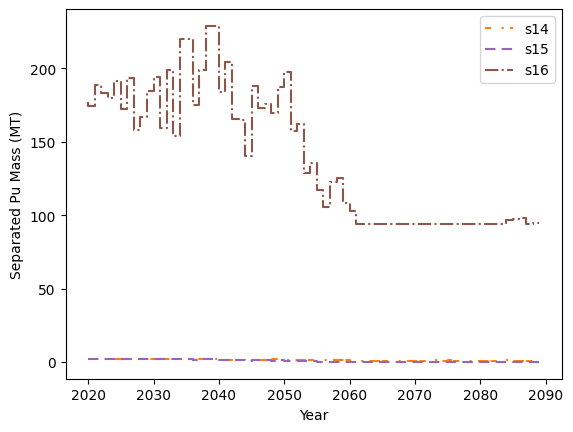

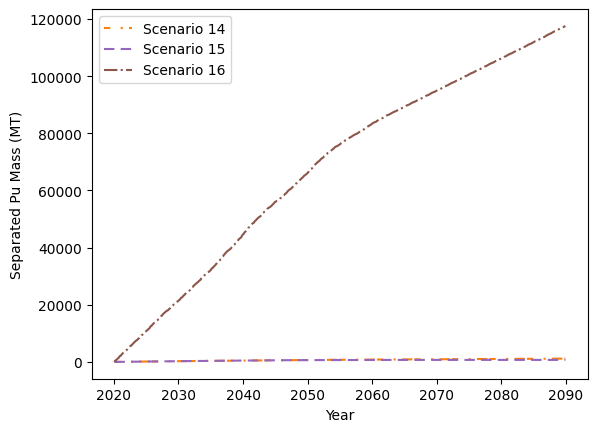

In [25]:
for key in transactions_senders:
    counter = 661
    averages = []
    for ii in range(0, 70):
        year_data = sep_pu[key]['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
        
    plt.figure(0)
    plt.step(np.linspace(2020, 2089, 70), averages, label=key,
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Separated Pu Mass (MT)')
    plt.legend()
    plt.savefig("figures/nogrowth_recycle_sep_pu.pdf")
    
    plt.figure(2)
    plt.plot(sep_pu[key]['Year'][661:], sep_pu[key]['Quantity'][661:].cumsum()/1000,
            label=labels[key], color = colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Separated Pu Mass (MT)')
    plt.legend()
    plt.savefig("figures/nogrowth_recycle_sep_pu_cumulative.pdf")

In [27]:
#reporting seaparated Pu masses
for scenario in transactions_senders:
    print('Average Sep Pu in', scenario, 'after 2020:', sep_pu[scenario]['Quantity'][721:].mean()/1000)
    print('Maximum  Sep Pu in', scenario, ':', sep_pu[scenario]['Quantity'][721:].max()/1000)
    print('Cumulative Sep Pu in', scenario, ':', sep_pu[scenario]['Quantity'][721:].cumsum()[1499]/1000)

Average Sep Pu in s14 after 2020: 1.310138216621793
Maximum  Sep Pu in s14 : 4.734735042744031
Cumulative Sep Pu in s14 : 1020.5976707483759
Average Sep Pu in s15 after 2020: 0.7378320810901537
Maximum  Sep Pu in s15 : 4.734735042744031
Cumulative Sep Pu in s15 : 574.7711911692319
Average Sep Pu in s16 after 2020: 137.02978068827773
Maximum  Sep Pu in s16 : 454.3196487699934
Cumulative Sep Pu in s16 : 106746.19915616809


## 1% growth scenarios

### Reactor numbers 

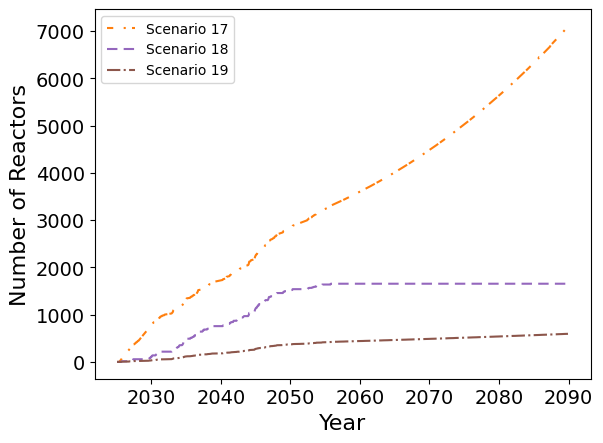

In [94]:
reactors_1percent = {'s17':'','s18':'','s19':''}
plt.figure(0)
for scenario in reactors_1percent:
    reactors_1percent[scenario] = tm.get_prototype_totals(out_files[scenario], non_lwr, adv_rxs)
    plt.plot(reactors_1percent[scenario]['Year'][721:], reactors_1percent[scenario]['advrx_total'][721:], 
             label=labels[scenario],
            color = colors[scenario], linestyle=lines[scenario])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Reactors', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig('figures/1percent_recycle_reactors.pdf', bbox_inches='tight')

In [95]:
for scenario in reactors_1percent:
    for adv_rx in adv_rxs:
        print(f'Max {adv_rx} in {scenario}:', reactors_1percent[scenario][adv_rx +'_total'].max())
        print(f'Max {adv_rx} added in one step in {scenario}:', reactors_1percent[scenario][adv_rx +'_enter'].max())
        prototype_sum = reactors_1percent[scenario][adv_rx +'_enter'].cumsum()
        print(f'Total number of {adv_rx} deployed in {scenario}:', prototype_sum.iloc[-1])
    print(f'Max Adv Rx in {scenario}:', reactors_1percent[scenario]['advrx_total'].max())
    print(f'Max Adv Rx added in one step in {scenario}:', reactors_1percent[scenario]['advrx_enter'].max())
    advrx_sum = reactors_1percent[scenario]['advrx_enter'].cumsum()
    print(f'Total number of reactors deployed in {scenario}:', advrx_sum.iloc[-1])  

Max MMR in s17: 5228.0
Max MMR added in one step in s17: 46.0
Total number of MMR deployed in s17: 10363.0
Max Xe-100 in s17: 1837.0
Max Xe-100 added in one step in s17: 47.0
Total number of Xe-100 deployed in s17: 1867.0
Max VOYGR in s17: 42.0
Max VOYGR added in one step in s17: 1.0
Total number of VOYGR deployed in s17: 43.0
Max SFR in s17: 0.0
Max SFR added in one step in s17: 0.0
Total number of SFR deployed in s17: 0.0
Max Adv Rx in s17: 7107.0
Max Adv Rx added in one step in s17: 58.0
Total number of reactors deployed in s17: 12273.0
Max MMR in s18: 542.0
Max MMR added in one step in s18: 16.0
Total number of MMR deployed in s18: 1633.0
Max Xe-100 in s18: 1105.0
Max Xe-100 added in one step in s18: 46.0
Total number of Xe-100 deployed in s18: 1155.0
Max VOYGR in s18: 7.0
Max VOYGR added in one step in s18: 1.0
Total number of VOYGR deployed in s18: 7.0
Max SFR in s18: 0.0
Max SFR added in one step in s18: 0.0
Total number of SFR deployed in s18: 0.0
Max Adv Rx in s18: 1654.0
Max 

### Fuel Mass

In [4]:
transactions_1percent = {'s17':'', 's18':'', 's19':''}
for scenario in transactions_1percent:
    transactions_1percent[scenario] = tm.add_receiver_prototype(out_files[scenario])

In [5]:
# Divide up fuel mass by prototype
uranium_to_reactors_1percent = {'s17_MMR':'', 's17_Xe-100':'', 's17_VOYGR':'', 's17_SFR':'', 's17_LWR':'',
                                's18_MMR':'', 's18_Xe-100':'', 's18_VOYGR':'', 's18_SFR':'', 's18_LWR':'',
                                's19_MMR':'', 's19_Xe-100':'', 's19_VOYGR':'', 's19_SFR':'', 's19_LWR':''}
mox_to_reactors_1percent = { 's17_Xe-100':'', 's17_VOYGR':'', 's17_SFR':'', 
                             's18_Xe-100':'', 's18_VOYGR':'', 's18_SFR':'', 
                             's19_Xe-100':'', 's19_VOYGR':'', 's19_SFR':'',}

for key in uranium_to_reactors_1percent:
    scenario = key[:3]
    reactor = key[4:]
    if reactor == 'LWR':
        uranium_to_reactors_1percent[key] = dfa.commodity_to_LWR(transactions_1percent[scenario], 
                                                       'fresh_uox',adv_rxs)
    else:
        uranium_to_reactors_1percent[key] = dfa.commodity_to_prototype(transactions_1percent[scenario], 
                                                       uox_commodity[reactor], reactor)
        uranium_to_reactors_1percent[key]['Quantity'] = uranium_to_reactors_1percent[key]['Quantity']*uranium_fractions[reactor]
    if reactor == 'Xe-100' or reactor == 'VOYGR' or reactor == 'SFR':
            mox_to_reactors_1percent[key] = dfa.commodity_to_prototype(transactions_1percent[scenario],
                                                     mox_commodity[reactor], reactor)


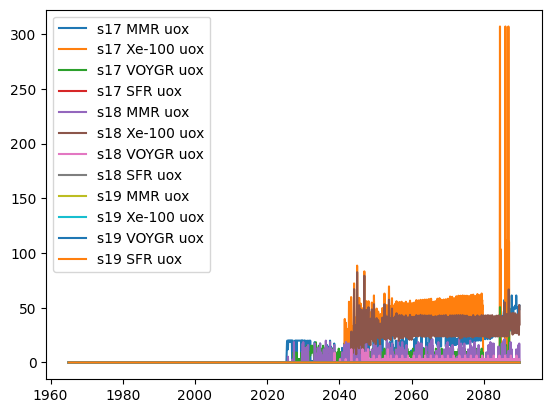

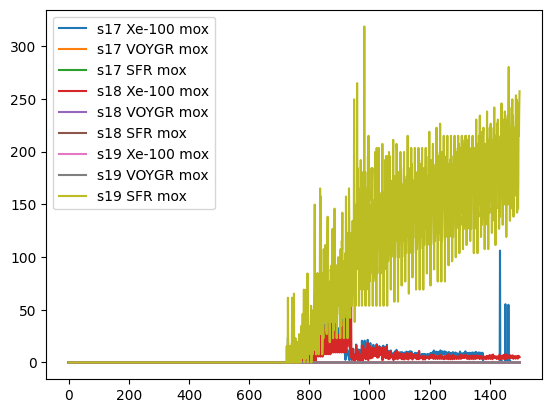

In [44]:
for scenario in transactions_1percent:
    plt.figure(1)
    for reactor in adv_rxs:
        plt.plot(uranium_to_reactors_1percent[scenario + '_' + reactor]['Year'],
                 uranium_to_reactors_1percent[scenario + '_' + reactor]['Quantity']/1000, label = (scenario + ' ' + reactor+' uox'))
    plt.legend()
    
    plt.figure(2)
    for reactor in ['Xe-100','VOYGR', 'SFR']:
        plt.plot(mox_to_reactors_1percent[scenario + '_' + reactor]['Quantity']/1000, label = (scenario + ' ' + reactor+' mox'))
    plt.legend()

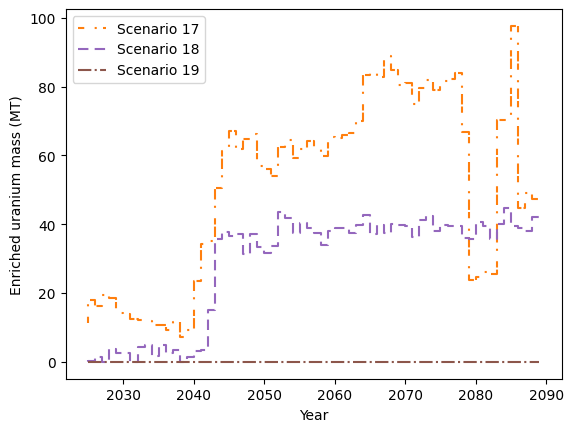

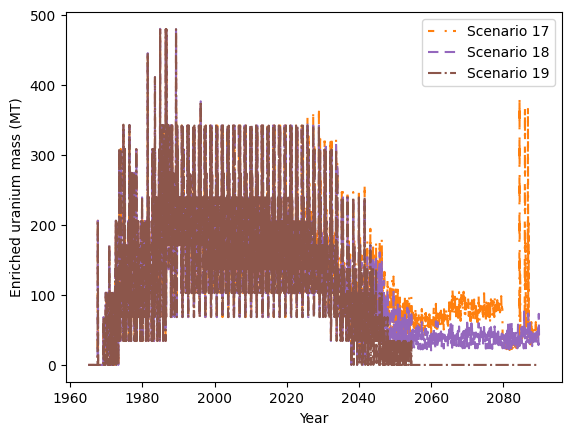

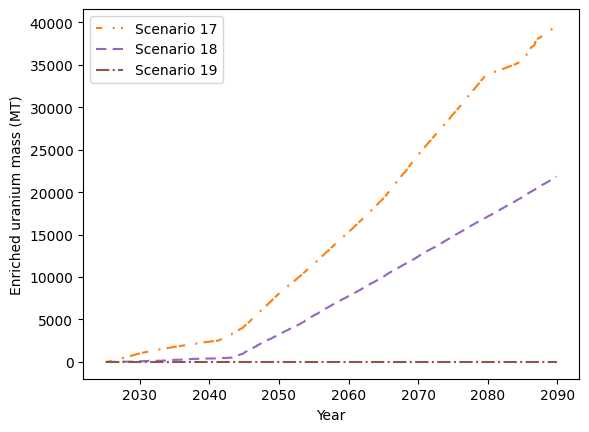

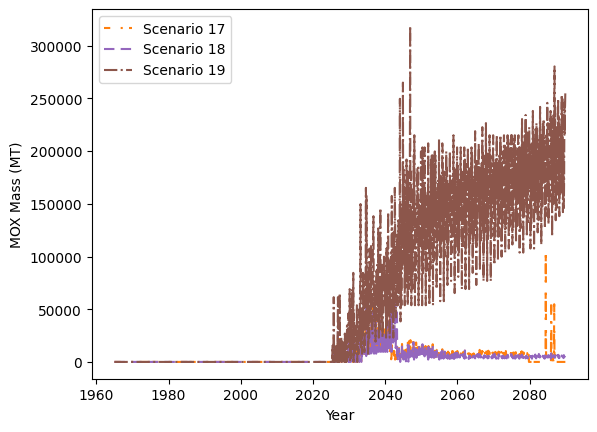

In [46]:
for key in transactions_1percent:
    AR_uranium = uranium_to_reactors_1percent[key + '_MMR'].copy()
    for reactor in ['Xe-100', 'VOYGR']:
        AR_uranium['Quantity'] += uranium_to_reactors_1percent[key + '_' + reactor]['Quantity']
    averages = []
    counter = 721
    for ii in range(0, 65):
        year_data = AR_uranium['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter +=12
        
    plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key], 
            color =colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Enriched uranium mass (MT)')
    plt.legend()
    
    total_uranium = AR_uranium['Quantity'] + uranium_to_reactors_1percent[key + '_LWR']['Quantity']
    plt.figure(1)
    plt.plot(uranium_to_reactors_1percent[key + '_MMR']['Year'], total_uranium/1000, 
            label = labels[key], color = colors[key], linestyle=lines[key]) 
    plt.xlabel('Year')
    plt.ylabel('Enriched uranium mass (MT)')
    plt.legend()
    
    plt.figure(2)
    plt.plot(AR_uranium['Year'][721:], AR_uranium['Quantity'][721:].cumsum()/1000,
            label=labels[key], color=colors[key], linestyle = lines[key])
    plt.xlabel('Year')
    plt.ylabel('Enriched uranium mass (MT)')
    plt.legend()
    
    total_mox = mox_to_reactors_1percent[key+'_Xe-100']['Quantity'] + mox_to_reactors_1percent[key+'_VOYGR']['Quantity'] + \
                mox_to_reactors_1percent[key+'_SFR']['Quantity']
    plt.figure(3)
    plt.plot(mox_to_reactors_1percent[key+'_Xe-100']['Year'], total_mox,
            label=labels[key], color=colors[key], linestyle = lines[key])
    plt.xlabel('Year')
    plt.ylabel('MOX Mass (MT)')
    plt.legend()

### Enrichment

In [47]:
tails_1percent = {'s17_MMR':'', 's17_Xe-100':'', 's17_VOYGR':'', 's17_SFR':'', 's17_LWR':'',
                                's18_MMR':'', 's18_Xe-100':'', 's18_VOYGR':'', 's18_SFR':'', 's18_LWR':'',
                                's19_MMR':'', 's19_Xe-100':'', 's19_VOYGR':'', 's19_SFR':'', 's19_LWR':''}
feed_1percent = {'s17_MMR':'', 's17_Xe-100':'', 's17_VOYGR':'', 's17_SFR':'', 's17_LWR':'',
                                's18_MMR':'', 's18_Xe-100':'', 's18_VOYGR':'', 's18_SFR':'', 's18_LWR':'',
                                's19_MMR':'', 's19_Xe-100':'', 's19_VOYGR':'', 's19_SFR':'', 's19_LWR':''}
SWU_1percent = {'s17_MMR':'', 's17_Xe-100':'', 's17_VOYGR':'', 's17_SFR':'', 's17_LWR':'',
                                's18_MMR':'', 's18_Xe-100':'', 's18_VOYGR':'', 's18_SFR':'', 's18_LWR':'',
                                's19_MMR':'', 's19_Xe-100':'', 's19_VOYGR':'', 's19_SFR':'', 's19_LWR':''}

for key in tails_1percent:
    reactor = key[4:]
    tails_1percent[key] = dfa.calculate_tails(uranium_to_reactors_1percent[key]['Quantity'],
                                    assays[reactor], assays['tails'], assays['feed'])
    feed_1percent[key] = dfa.calculate_feed(uranium_to_reactors_1percent[key]['Quantity'],
                                  tails_1percent[key])
    SWU_1percent[key] = dfa.calculate_SWU(uranium_to_reactors_1percent[key]['Quantity'], assays[reactor],
                                tails_1percent[key], assays['tails'], feed_1percent[key], assays['feed'])

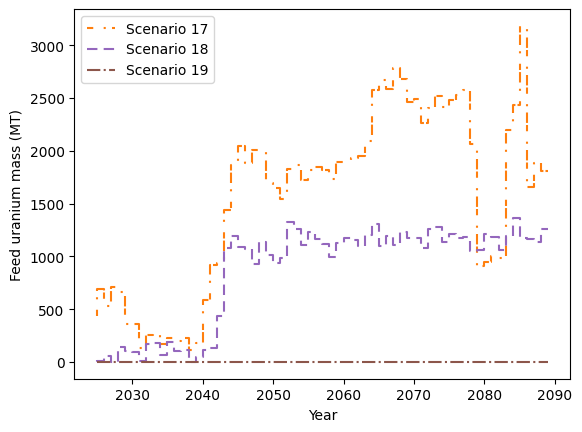

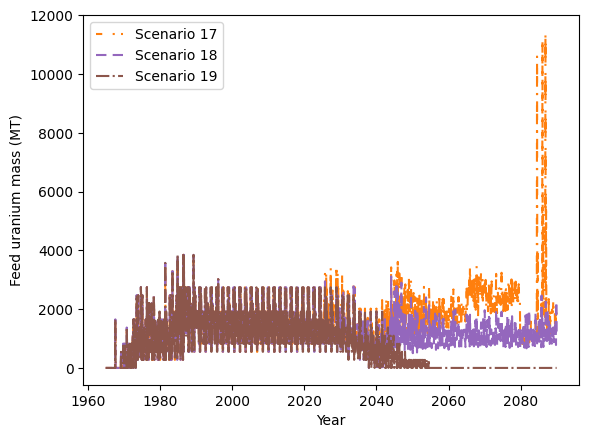

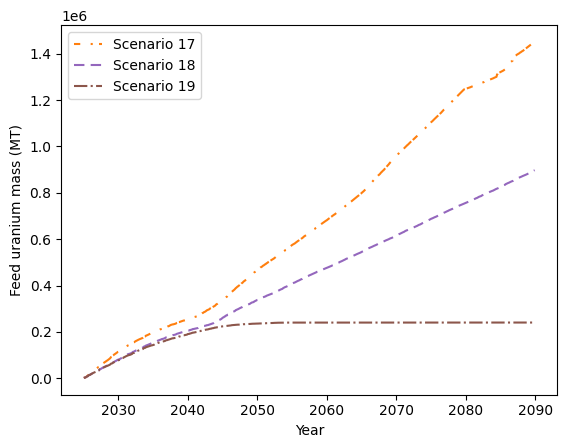

In [48]:
# feed U
for key in transactions_1percent:
    AR_feed = feed_1percent[key + '_MMR'].copy()
    for reactor in ['Xe-100','VOYGR']:
        AR_feed += feed_1percent[key + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0, 65):
        year_data = AR_feed[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
        
    plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Feed uranium mass (MT)')
    plt.legend()
    
    total_feed = AR_feed + feed_1percent[key + '_LWR']
    plt.figure(1)
    plt.plot(uranium_to_reactors_1percent[key + '_MMR']['Year'], total_feed/1000,
            label=labels[key], color = colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Feed uranium mass (MT)')
    plt.legend()
    
    plt.figure(2)
    plt.plot(uranium_to_reactors_1percent[key + '_MMR']['Year'][721:], total_feed[721:].cumsum()/1000,
            label=labels[key], color = colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Feed uranium mass (MT)')
    plt.legend()

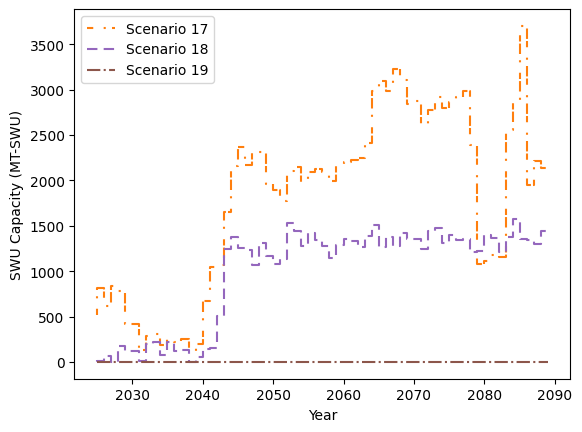

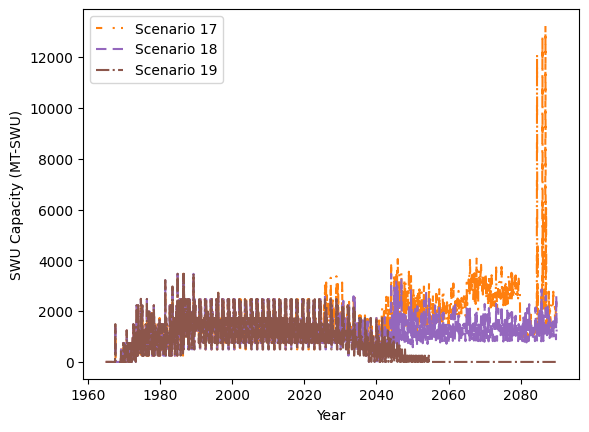

In [49]:
# SWU 
for key in transactions_1percent:
    AR_swu = SWU_1percent[key + '_MMR'].copy()
    for reactor in ['Xe-100','VOYGR']:
        AR_swu += SWU_1percent[key + '_' + reactor]
    counter = 721
    averages = []
    for ii in range(0, 65):
        year_data = AR_swu[counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
        
    plt.figure(0)
    plt.step(np.linspace(2025, 2089, 65), averages, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('SWU Capacity (MT-SWU)')
    plt.legend()
    
    total_swu = AR_swu + SWU_1percent[key + '_LWR']
    plt.figure(1)
    plt.plot(uranium_to_reactors_1percent[key + '_MMR']['Year'], total_swu/1000,
            label=labels[key], color = colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('SWU Capacity (MT-SWU)')
    plt.legend()

### Waste mass -- disposed of in HLW Sink

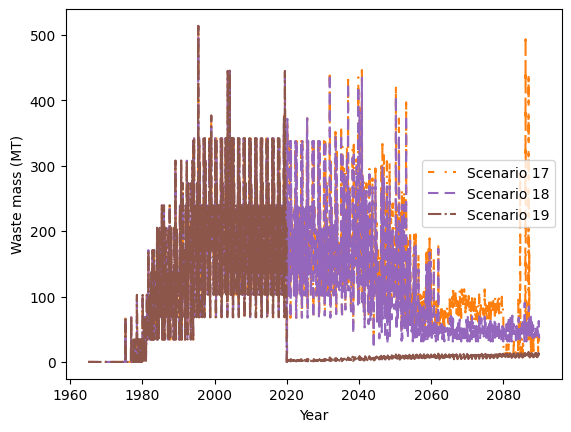

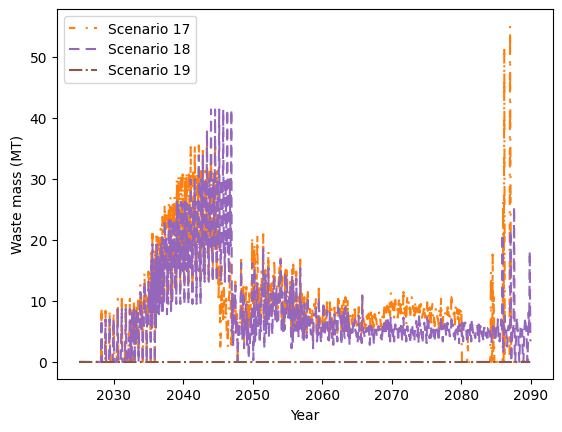

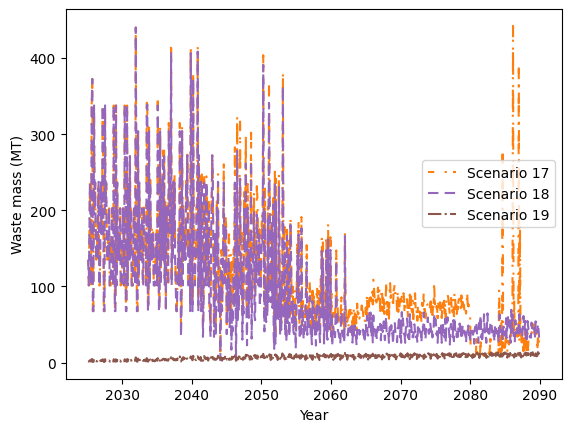

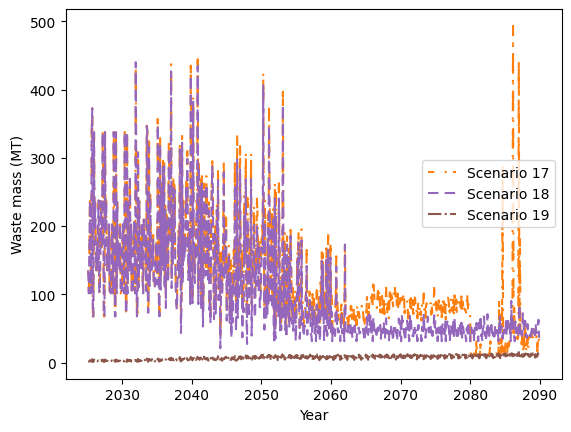

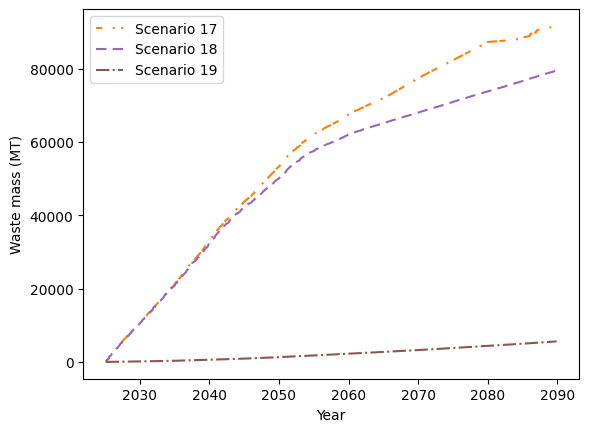

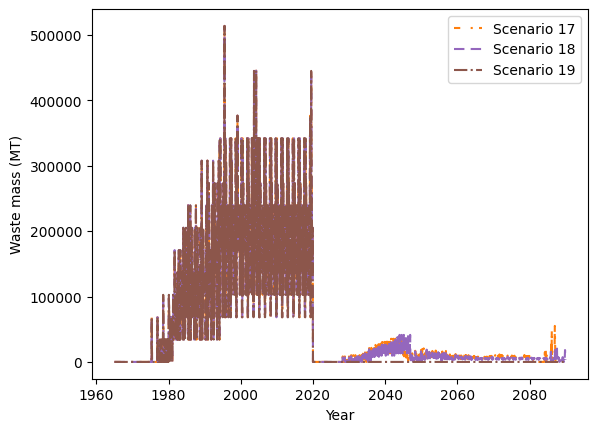

In [51]:
total_waste = {'s17':'', 's18':'','s19':''} # all material sent to repository
mox_waste = {'s17':'', 's18':'','s19':''} # spent MOX assemblies sent to repository
separations_waste = {'s17':'', 's18':'','s19':''} # Separated waste, HLW
transition_waste = {'s17':'', 's18':'','s19':''}  # MOX and Separated waste (SNF + HLW)
snf_waste = {'s17':'', 's18':'','s19':''} 

for key in total_waste:
    total_waste[key] = dfa.transactions_to_prototype(transactions_1percent[key], 'Sink_HLW')
    LWR_waste = dfa.transactions_to_prototype(transactions_1percent[key], 'Sink_LWR_UOX')
    total_waste[key]['Quantity'] += LWR_waste['Quantity']

    separations_waste[key] = dfa.commodity_to_prototype(transactions_1percent[key], 'separated_waste', 'Sink_HLW')
    mox_waste[key] = dfa.commodity_to_prototype(transactions_1percent[key], 'cool_spent_mox', 'Sink_HLW')
    transition_waste[key] = separations_waste[key]['Quantity'] + mox_waste[key]['Quantity']
    snf_waste[key] = mox_waste[key]['Quantity'] + LWR_waste['Quantity']
        
    plt.figure(0)
    plt.plot(total_waste[key]['Year'], total_waste[key]['Quantity']/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Waste mass (MT)')
    plt.legend()
    
    #plt.figure(1)
    #plt.plot(waste[key]['Year'], waste[key]['Quantity'].cumsum()/1000, label=labels[key],
    #        color=colors[key], linestyle=lines[key])
    #plt.xlabel('Year')
    #plt.ylabel('Waste mass (MT)')
    #plt.legend()

    plt.figure(2)
    plt.plot(mox_waste[key]['Year'][721:], mox_waste[key]['Quantity'][721:]/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Waste mass (MT)')
    plt.legend()

    plt.figure(3)
    plt.plot(separations_waste[key]['Year'][721:], separations_waste[key]['Quantity'][721:]/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Waste mass (MT)')
    plt.legend()
    
    plt.figure(4)
    plt.plot(separations_waste[key]['Year'][721:], transition_waste[key][721:]/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Waste mass (MT)')
    plt.legend()

    plt.figure(5)
    plt.plot(separations_waste[key]['Year'][721:], transition_waste[key][721:].cumsum()/1000, label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Waste mass (MT)')
    plt.legend()
    
    plt.figure(6)
    plt.plot(separations_waste[key]['Year'], snf_waste[key], label=labels[key],
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Waste mass (MT)')
    plt.legend()

### Separated Pu

In [57]:
sep_pu_1percent = {'s17':'', 's18':'','s19':''} 
transactions_senders_1percent = {'s17':'', 's18':'','s19':''}  
for key in sep_pu_1percent:
    transactions_senders_1percent[key] = tm.add_sender_prototype(out_files[key])
    sep_pu_1percent[key] = dfa.commodity_from_prototype(transactions_senders_1percent[key],
                                               'separated_fissile',
                                               'SeparationsFacility')

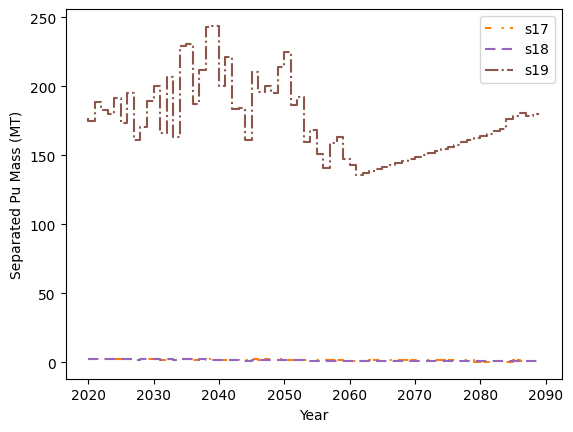

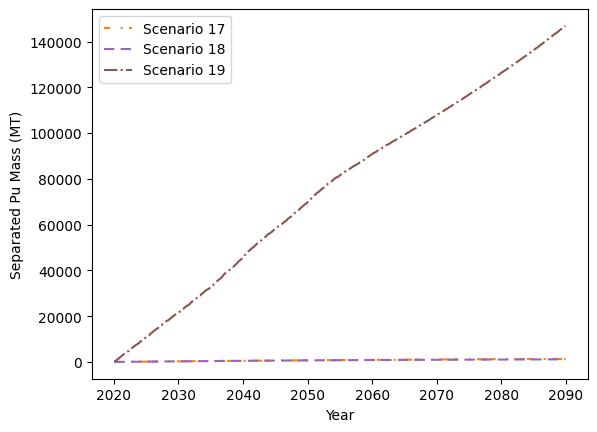

In [60]:
for key in sep_pu_1percent:
    counter = 661
    averages = []
    for ii in range(0, 70):
        year_data = sep_pu_1percent[key]['Quantity'][counter:counter+12]/1000
        averages.append(year_data.mean())
        counter += 12
        
    plt.figure(0)
    plt.step(np.linspace(2020, 2089, 70), averages, label=key,
            color=colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Separated Pu Mass (MT)')
    plt.legend()
    
    plt.figure(2)
    plt.plot(sep_pu_1percent[key]['Year'][661:], sep_pu_1percent[key]['Quantity'][661:].cumsum()/1000,
            label=labels[key], color = colors[key], linestyle=lines[key])
    plt.xlabel('Year')
    plt.ylabel('Separated Pu Mass (MT)')
    plt.legend()